Importer la base de donnée avec ces 2 tutos (FR ou En)
FR
https://www.tresfacile.net/python-et-les-bases-de-donnees-sqlite3/

EN
https://likegeeks.com/python-sqlite3-tutorial/

In [14]:
import sqlite3 as sq3
import sqlalchemy as sqa

In [17]:
%matplotlib -l

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [12]:
conn = sq3.connect("./Fifa19.db") # Crée une connexion  vers la database. Dans notre cas la database est locale.
conn

In [13]:
cursor = conn.cursor()

In [6]:
def tables_in_sqlite_db(conn):
    cursor = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [
        v[0] for v in cursor.fetchall()
        if v[0] != "sqlite_sequence"
    ]
    cursor.close()
    return tables

In [7]:
tables = tables_in_sqlite_db(conn)

In [8]:
def get_columns_name(conn, columns_name) :
    cursor = conn.execute("SELECT *FROM INFORMATION_SCHEMA.COLUMNS WHERE (TABLE_NAME = " +columns_name+')')
    columns = cursor.fetchall()
    cursor.close()
    return columns

In [9]:
cursor.execute("select*from fifa19")

In [24]:
conn.keys() #Un truc comme ça permet de connaître le nom des tables dans la db

AttributeError: 'sqlite3.Connection' object has no attribute 'keys'

*NB : Il est possible de connaître le nom des tables*

In [28]:
import pandas as pd # J'ai besoin de pandas pour travailler avec des dataframe. Je l'importe
dfTotal = pd.read_sql_query("select*from fifa19", conn) 
dfTotal

,Index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96,33,28,26,6,11,15,14,8,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95,28,31,23,7,11,15,14,11,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94,27,24,33,9,9,15,15,11,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68,15,21,13,90,85,87,88,94,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88,68,58,51,15,13,5,10,13,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45,40,48,47,10,13,7,8,9,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42,22,15,19,10,9,9,5,12,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41,32,13,11,6,5,10,6,13,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46,20,25,27,14,6,14,8,9,€143K


In [29]:
dfTotal.describe()

,Index,ID,Age,Overall,Potential,Special
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000


Avant cette requête ne fonctionnait pas. On avait un message qui disait qu'on est limité.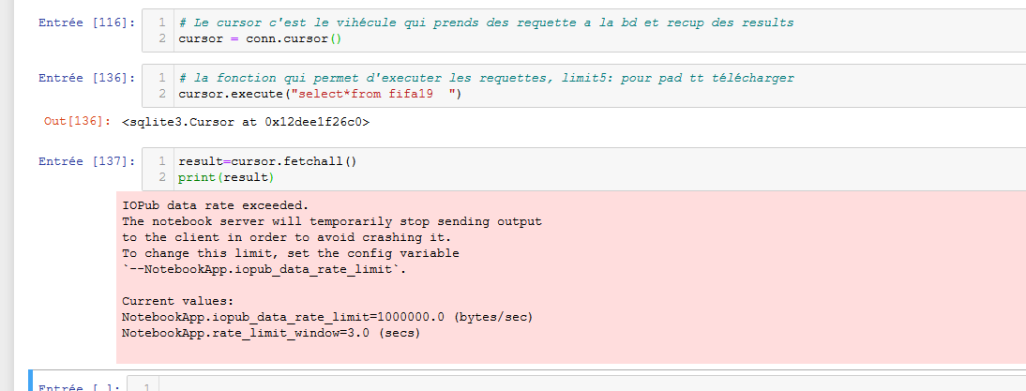

Par conséquent, j'entrepris de splitter ma base de donnée. Mais je n'avais pas fait attention à sa taille. Sur sqlite elle semblait ne faire que 1000 lignes. En réalité j'aurais dû vérifier le nombre de ligne :

In [30]:
cursor.execute("select count(*) from fifa19").fetchall()

[(18207,)]

In [ ]:
cursor.execute("select*from fifa19 limit 500") # J'utilise le cursor pour executer la requête SQL
split1 = pd.DataFrame(cursor.fetchall()) # Je peux récupérer le résultat avec la fonction fetchall() du cursor
split1 # J'affiche mon nouveau dataframe.

In [ ]:
# pour la deuxième partie, je fais la même chose en économisant quelques lignes.
split2 = cursor.execute("select*from fifa19 limit 500 Offset 500")
split2

Maintenant je dois réunir mes deux tableaux pour n'en faire qu'un seul. Je pourrai donc commencer mes visualisation des données.


Je voulais montrer pourquoi on avait split la db en 2 (Car on était limité en taille)  mais on s'est rendu compte que maintenant on pouvait importer toute la base d'un coup.

Je vais donc pouvoir travailler à visionner les données

In [32]:
import seaborn as sns
print(dfTotal.dtypes)

Index              int64
ID                 int64
Name              object
Age                int64
Photo             object
                   ...  
GKHandling        object
GKKicking         object
GKPositioning     object
GKReflexes        object
Release Clause    object
Length: 89, dtype: object


In [ ]:
#sns.pairplot(dfTotal.)

In [33]:
dfTotal


,Index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96,33,28,26,6,11,15,14,8,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95,28,31,23,7,11,15,14,11,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94,27,24,33,9,9,15,15,11,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68,15,21,13,90,85,87,88,94,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88,68,58,51,15,13,5,10,13,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45,40,48,47,10,13,7,8,9,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42,22,15,19,10,9,9,5,12,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41,32,13,11,6,5,10,6,13,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46,20,25,27,14,6,14,8,9,€143K


In [34]:
df_wage = dfTotal.Wage
df_wage

0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
         ...  
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18207, dtype: object

In [35]:
df_wage = df_wage.apply(lambda x : x[1:])
df_wage

0        565K
1        405K
2        290K
3        260K
4        355K
         ... 
18202      1K
18203      1K
18204      1K
18205      1K
18206      1K
Name: Wage, Length: 18207, dtype: object

In [63]:
def change_text(x) :
    unit = x[-1:]
    isKilo = x[-1:] == 'K'
    isMega = x[-1:] == 'M'
    if isKilo: 
        result = int(x[0:-1])*1000
    if isMega:
        result = int(x[0:-1])*1000000
    else : 
        result = int(x)
    
    print('For '+ x +', x[-1:] = '+ x[-1:]+ " so x[-1:] == 'K' is " + str(x[-1:] == 'K') )
    print(' Then ' + x + ' is convert in ' + str(result))
    return result

In [64]:
change_K_1000("1M")

For 1M, x[-1:] = M so x[-1:] == 'K' is False
 Then 1M is convert in 1000000


1000000

In [55]:
df_wageTest = df_wage.apply(change_K_1000)
print(df_wageTest)

For 565K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 565Kis convert in 565000
For 405K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 405Kis convert in 405000
For 290K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 290Kis convert in 290000
For 260K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 260Kis convert in 260000
For 355K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 355Kis convert in 355000
For 340K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 340Kis convert in 340000
For 420K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 420Kis convert in 420000
For 455K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 455Kis convert in 455000
For 380K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 380Kis convert in 380000
For 94K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 94Kis convert in 94000
For 205K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 205Kis convert in 205000
For 355K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 355Kis convert in 355000
For 125K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 125Kis convert in 125000
For 285K, x[-1:

For 67K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 67Kis convert in 67000
For 32K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 32Kis convert in 32000
For 31K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 31Kis convert in 31000
For 26K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 26Kis convert in 26000
For 55K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 55Kis convert in 55000
For 16K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 16Kis convert in 16000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 53K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 53Kis convert in 53000
For 48K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 48Kis convert in 48000
For 25K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 25Kis convert in 25000
For 43K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 43Kis convert in 43000
For 15K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 15Kis convert in 15000
For 32K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 32Kis convert in 32000
For 55K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 55Ki

For 31K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 31Kis convert in 31000
For 25K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 25Kis convert in 25000
For 13K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 13Kis convert in 13000
For 29K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 29Kis convert in 29000
For 25K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 25Kis convert in 25000
For 46K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 46Kis convert in 46000
For 10K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 10Kis convert in 10000
For 22K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 22Kis convert in 22000
For 24K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 24Kis convert in 24000
For 34K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 34Kis convert in 34000
For 13K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 13Kis convert in 13000
For 20K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 20Kis convert in 20000
For 9K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 9Kis convert in 9000
For 28K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 28Ki

For 14K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 14Kis convert in 14000
For 16K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 16Kis convert in 16000
For 30K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 30Kis convert in 30000
For 14K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 14Kis convert in 14000
For 22K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 22Kis convert in 22000
For 25K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 25Kis convert in 25000
For 8K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 8Kis convert in 8000
For 15K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 15Kis convert in 15000
For 26K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 26Kis convert in 26000
For 5K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 5Kis convert in 5000
For 21K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 21Kis convert in 21000
For 28K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 28Kis convert in 28000
For 35K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 35Kis convert in 35000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis con

 Then 14Kis convert in 14000
For 16K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 16Kis convert in 16000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 40K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 40Kis convert in 40000
For 29K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 29Kis convert in 29000
For 34K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 34Kis convert in 34000
For 6K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 6Kis convert in 6000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 26K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 26Kis convert in 26000
For 20K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 20Kis convert in 20000
For 19K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 19Kis convert in 19000
For 18K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 18Kis convert in 18000
For 13K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 13Kis convert in 13000
For 12K, x[-1:] = Kso x[-1:] == 'K

For 20K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 20Kis convert in 20000
For 15K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 15Kis convert in 15000
For 7K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 7Kis convert in 7000
For 9K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 9Kis convert in 9000
For 10K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 10Kis convert in 10000
For 11K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 11Kis convert in 11000
For 10K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 10Kis convert in 10000
For 21K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 21Kis convert in 21000
For 20K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 20Kis convert in 20000
For 7K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 7Kis convert in 7000
For 6K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 6Kis convert in 6000
For 20K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 20Kis convert in 20000
For 11K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 11Kis convert in 11000
For 13K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 13Kis convert

 Then 6Kis convert in 6000
For 17K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 17Kis convert in 17000
For 33K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 33Kis convert in 33000
For 10K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 10Kis convert in 10000
For 27K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 27Kis convert in 27000
For 7K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 7Kis convert in 7000
For 12K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 12Kis convert in 12000
For 5K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 5Kis convert in 5000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 18K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 18Kis convert in 18000
For 22K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 22Kis convert in 22000
For 13K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 13Kis convert in 13000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 13K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 13Kis convert in 13000
For 11K, x[-1:] = Kso x[-1:] == 'K' 

For 17K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 17Kis convert in 17000
For 5K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 5Kis convert in 5000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 39K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 39Kis convert in 39000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 14K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 14Kis convert in 14000
For 5K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 5Kis convert in 5000
For 8K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 8Kis convert in 8000
For 10K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 10Kis convert in 10000
For 9K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 9Kis convert in 9000
For 13K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 13Kis convert in 13000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 7K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 7Kis convert in 7000
For 11K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 11Kis convert in 11000
Fo

For 7K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 7Kis convert in 7000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 12K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 12Kis convert in 12000
For 5K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 5Kis convert in 5000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 0, x[-1:] = 0so x[-1:] == 'K' is False
 Then 0is convert in 0
For 5K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 5Kis convert in 5000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 0, x[-1:] = 0so x[-1:] == 'K' is False
 Then 0is convert in 0
For 22K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 22Kis convert in 22000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 7K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 7Kis convert in 7000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 21K, x[-1:] = Kso 

 Then 6Kis convert in 6000
For 10K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 10Kis convert in 10000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 5K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 5Kis convert in 5000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 10K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 10Kis convert in 10000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 6K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 6Kis convert in 6000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis con

 Then 4Kis convert in 4000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 6K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 6Kis convert in 6000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 5K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 5Kis convert in 5000
For 12K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 12Kis convert in 12000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 5K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 5Kis convert in 5000
For 12K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 12Kis convert in 12000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis con

For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 0, x[-1:] = 0so x[-1:] == 'K' is False
 Then 0is convert in 0
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 7K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 7Kis convert in 7000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 8K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 8Kis convert in 8000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 7K, x[-1:] = Kso x[-

 Then 2Kis convert in 2000
For 6K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 6Kis convert in 6000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 10K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 10Kis convert in 10000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 5K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 5Kis convert in 5000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 6K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 6Kis convert in 6000
For 0, x[-1:] = 0so x[-1:] == 'K' is False
 Then 0is convert in 0
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in

 Then 0is convert in 0
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 8K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 8Kis convert in 8000
For 11K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 11Kis convert in 11000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 7K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 7Kis convert in 7000
For 10K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 10Kis convert in 10000
For 6K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 6Kis convert in 6000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert

 Then 4Kis convert in 4000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 5K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 5Kis convert in 5000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert i

 Then 1Kis convert in 1000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 10K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 10Kis convert in 10000
For 6K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 6Kis convert in 6000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis conver

For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 5K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 5Kis convert in 5000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso

 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 5K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 5Kis convert in 5000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert i

For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso

For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 6K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 6Kis convert in 6000
For 0, x[-1:] = 0so 

For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 4K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 4Kis convert in 4000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso

For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 3K, x[-1:] = Kso

 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert i

 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 0, x[-1:] = 0so x[-1:] == 'K' is False
 Then 0is convert in 0
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 3K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 3Kis convert in 3000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 10

 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 2K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 2Kis convert in 2000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert in 1000
For 1K, x[-1:] = Kso x[-1:] == 'K' is True
 Then 1Kis convert i

In [ ]:
df_wageTest

In [ ]:
dfTotal['Wage en €'] = df_wageTest
dfTotal

In [ ]:
cursor.execute()